# 2. Создание нейронной сети без использования готовых решений

__Автор__: Никита Владимирович Блохин (NVBlokhin@fa.ru)

Финансовый университет, 2020 г. 

In [1]:
import torch

## 1. Создание нейронов и полносвязных слоев

1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат. 

In [2]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
 
    def forward(self, inputs):
        return self.weights @ inputs + self.bias


In [3]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [4]:
tens = Neuron(weights, bias).forward(inputs)
tens

tensor(4.8400)

1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат. 

In [5]:
class Linear():
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases

    def forward(self, inputs):
        return (inputs @ self.weights) + self.biases

In [6]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]]).T

biases = torch.tensor([3.14, 2.71, 7.2])

In [7]:
tens = Linear(weights, biases).forward(inputs)
tens

tensor([ 4.8400,  0.1700, 10.3900])

1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [8]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

In [9]:
class Linear():
    def __init__(self, weights, biases):
        self.weights = weights
        self.biases = biases

    def forward(self, inputs):
        return (inputs @ self.weights) + self.biases

In [10]:
tens = Linear(weights, biases).forward(inputs)
tens

tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])

1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [11]:
class Linear:
  def __init__(self, n_features, n_neurons):
    self.weights = torch.normal(0, 1, (n_neurons, n_features))
    self.biases = torch.zeros((n_neurons,))
  
  def forward(self, inputs):
    return (self.weights @ inputs.T).T + self.biases

In [12]:
inputs = torch.tensor([[1, 2, 3],
                       [2, 5, -1],
                       [-1.5, 2.7, 3.3]])

In [13]:
tens = Linear(3, 5).forward(inputs)
tens

tensor([[-3.0029,  2.3512,  2.0269,  1.2494, -1.6324],
        [-5.3494,  1.2171,  0.1510,  4.0923, -6.7450],
        [-1.5163,  6.1738, -0.9410,  0.3328,  1.6213]])

1.5 Используя решение из __1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7). 

In [14]:
inputs = torch.tensor([[1, 2, 3, 2.5], 
                       [2, 5, -1, 2], 
                       [-1.5, 2.7, 3.3, -0.8]])

In [15]:
Layer1 = Linear(3, 7)

In [16]:
Layer2 = Linear(4, 3)

In [17]:
tens = Layer1.forward(Layer2.forward(inputs))
tens

tensor([[  7.6073,  29.2517, -12.8940,   6.4153, -15.9679,  29.8865,  15.4410],
        [  1.0551,  30.2463, -13.7287,   3.7877, -10.8977,  17.4358,  16.1493],
        [ 13.6123,  -2.5681,   2.0432,   5.9746, -10.5610,  24.9928,  -1.2064]])

In [18]:
tens.shape

torch.Size([3, 7])

## 2. Создание функций активации

2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [19]:
class ReLU:
  def forward(self, inputs):
    # <реализовать логику ReLU>
    x = inputs.clone().detach()
    x[x < 0] = 0
    return x

In [20]:
tens = torch.normal(0, 1, (4,3))
tens

tensor([[ 0.2909, -0.2151,  0.7417],
        [-0.7607,  1.3583,  0.2722],
        [ 0.8832,  0.5747, -1.2073],
        [-0.1667,  1.0073,  0.3072]])

In [21]:
tens_ReLU = ReLU().forward(tens)
tens_ReLU

tensor([[0.2909, 0.0000, 0.7417],
        [0.0000, 1.3583, 0.2722],
        [0.8832, 0.5747, 0.0000],
        [0.0000, 1.0073, 0.3072]])

In [22]:
tens_ReLU = torch.nn.ReLU()(tens)
tens_ReLU

tensor([[0.2909, 0.0000, 0.7417],
        [0.0000, 1.3583, 0.2722],
        [0.8832, 0.5747, 0.0000],
        [0.0000, 1.0073, 0.3072]])

2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [23]:
class Softmax:
  def forward(self, inputs):
    # <реализовать логику Softmax>
    x = inputs.exp()
    return x / x.sum(dim=1).reshape(-1,1)

In [24]:
tens = Softmax().forward(torch.normal(0, 1, (4,3)))
tens

tensor([[0.5471, 0.1301, 0.3229],
        [0.4652, 0.1497, 0.3851],
        [0.1595, 0.3863, 0.4542],
        [0.2112, 0.7529, 0.0359]])

In [25]:
tens = torch.nn.Softmax(dim=1)(torch.normal(0, 1, (4,3)))
tens

tensor([[0.5070, 0.2192, 0.2738],
        [0.7961, 0.0506, 0.1533],
        [0.3574, 0.0728, 0.5697],
        [0.4198, 0.4152, 0.1650]])

2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [26]:
class ELU:
  def __init__(self, alpha):
    # <создать атрибут объекта alpha>
    self.alpha = alpha

  def forward(self, inputs):
    # <реализовать логику ReLU>
    x = inputs.clone().detach()
    x[x < 0] = self.alpha * (x[x < 0].exp() - 1)
    return x

In [27]:
tens = ELU(alpha=0.5).forward(torch.normal(0, 1, (4, 3)))
tens

tensor([[-0.3024, -0.0965,  0.7053],
        [-0.1379, -0.1320,  0.0800],
        [ 0.8383,  1.0084,  0.7176],
        [-0.4336, -0.2999,  0.5054]])

In [28]:
tens = torch.nn.ELU(alpha=0.5)(torch.normal(0, 1, (4, 3)))
tens

tensor([[-0.1514,  0.7366,  0.2210],
        [-0.1959,  1.4163,  0.1526],
        [ 1.1335,  0.2440, -0.4072],
        [ 0.0841,  0.7581, -0.2536]])

## 3. Создание функции потерь

3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [29]:
class MSELoss:
    def forward(self, y_pred, y_true):
        return torch.sum((y_pred - y_true) ** 2) / y_pred.shape[0]

In [30]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [31]:
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
    return -(y_true * y_pred.log()).sum(dim=1)

In [32]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                        [2, 5, -1, 2],
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [33]:
layer = Linear(inputs.shape[1], 3)
y_pred = Softmax().forward(layer.forward(inputs))
tens=CategoricalCrossentropyLoss().forward(y_pred, y)

In [34]:
tens

tensor([3.4454, 0.6854, 8.7096])

In [35]:
tens=torch.nn.CrossEntropyLoss(reduction="none")(layer.forward(inputs), y.repeat((3, 1)).to(float))
tens

tensor([3.4454, 0.6854, 8.7096], dtype=torch.float64)

3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [36]:
class MSELossL2:
  def __init__(self, lambda_, weights):
    self.lambda_ = lambda_
    self.reg_weights = self.lambda_ * (weights ** 2).sum(dim=1)

  def data_loss(self, y_pred, y_true):
    return MSELoss().forward(y_pred, y_true)

  def reg_loss(self, layer):
    # используйте атрибуты объекта layer, в которых хранятся веса слоя
    # <подсчет второго слагаемого из формулы>
    pass

  def forward(self, y_pred, y_true):
    return self.data_loss(y_pred, y_true) + self.reg_weights

In [37]:
tens = MSELossL2(0.5, layer.weights).forward(y_pred, y.repeat((3, 1)))
tens

tensor([2.4320, 2.1401, 3.4747])

In [38]:
tens = MSELoss().forward(y_pred, y.repeat((3, 1)))
tens

tensor(1.4463)

## 4. Обратное распространение ошибки

4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [69]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя


In [70]:
class MSELoss:
    def forward(self, y_pred, y_true):
        return (y_pred - y_true) ** 2

    def backward(self, y_pred, y_true):
        self.dinput = 2 * (y_pred - y_true)

4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [77]:
class Neuron:
    def __init__(self, n_inputs: int):
        self.n_inputs = n_inputs
        self.weights = torch.randn(n_inputs)
        self.bias = torch.randn(1)

    def forward(self, inputs):
        self.inputs = inputs
        return (self.inputs * self.weights).sum() + self.bias

    def backward(self, dvalue):
        self.dweights = dvalue * self.inputs
        self.dinput =  dvalue * self.weights
        self.dbias = dvalue

In [78]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])

In [79]:
naive_neuron = Neuron(4)
out = naive_neuron.forward(inputs)
print(out)

tensor([-1.5781])


4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [80]:
n_inputs = X.shape[1] # размерность
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []
for epoch in range(100):
    for x_example, y_example in zip(X, y):
        # нейрон
        y_pred =  neuron.forward(x_example)
        # функция потерь
        curr_loss = loss.forward(y_pred, y_example)
        losses.append(curr_loss)

        # обратите внимание на последовательность вызовов: от конца к началу
        #backward
        loss.backward(y_pred, y_example)
        neuron.backward(loss.dinput)

        # <шаг оптимизации для весов (weights и bias) нейрона>
        neuron.dweights -= learning_rate * neuron.dweights
        neuron.dbias -= learning_rate * neuron.dbias

In [81]:
tens = losses[::1000]
tens

[tensor([804.7729]),
 tensor([804.7729]),
 tensor([804.7729]),
 tensor([804.7729]),
 tensor([804.7729]),
 tensor([804.7729]),
 tensor([804.7729]),
 tensor([804.7729]),
 tensor([804.7729]),
 tensor([804.7729])]

4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи: 
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

4.2.1 Модифицируйте класс `MSELoss` из __3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами
 

In [82]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true) / y_pred.shape[0] # df/dy^


4.2.2. Модифицируйте класс `Neuron` из __4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. 

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [83]:
class Neuron:
  def __init__(self, n_inputs):
    self.n_inputs = n_inputs
    self.weights = torch.randn(1, n_inputs).T
    self.bias = torch.randn(1)


  def forward(self, inputs):
    self.inputs = inputs
    return torch.matmul(inputs, self.weights) + self.bias

  def backward(self, dvalue):
    self.dinputs = torch.matmul(dvalue, self.weights.T)
    self.dweights = torch.matmul(self.inputs.T, dvalue) # df/dW
    self.dbias = torch.sum(dvalue) # df/db


4.2.3 Допишите цикл для настройки весов нейрона

In [84]:
n_inputs = X.shape[1] # размерность
learning_rate = 0.01 #  скорость
n_epoch = 1000 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    y_pred = neuron.forward(X)
    curr_loss = loss.forward(y_pred, y)
    losses.append(curr_loss)

    #backward
    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias

In [87]:
tens = losses[::1000]
tens

[tensor(8320.5566)]

4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

4.3.1 Модифицируйте класс `Linear` из __1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [89]:
class Linear:
    def __init__(self, n_features, n_neurons):
        self.n_features = n_features
        self.n_neurons = n_neurons
        self.weights = torch.randn(n_neurons, n_features).T
        self.biases = torch.randn(n_neurons)

    def forward(self, inputs):
        self.inputs = inputs
        return torch.matmul(inputs, self.weights) + self.biases # <реализовать логику слоя>

    def backward(self, dvalues):
        self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW
        self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues) # df/db
        self.dinputs = torch.matmul(dvalues, self.weights.T) # df/dX

4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [91]:
n_inputs = X.shape[1]  # <размерность элемента выборки >
learning_rate = 0.01  #  скорость обучения
n_epoch = 1000  #  количество эпох

layer = Linear(n_inputs, 1)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    # forward pass
    y_pred = layer.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    loss.backward(y_pred, y)
    layer.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    layer.weights -= learning_rate * layer.dweights
    layer.biases -= learning_rate * layer.dbiases

In [93]:
tens = losses[::1000]
tens

[tensor(7858.3076)]

4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура: 
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [95]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size()) 

In [96]:
class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output
  
  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0

In [97]:
# создание компонентов сети
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)

loss = MSELoss()
lr = 0.02
ys = []
for epoch in range(2001):
    y_pred = fc2.forward(relu1.forward(fc1.forward(X)))
    data_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>
    if epoch % 200 == 0:
        print(f'epoch {epoch} mean loss {data_loss}')
        ys.append(y_pred)

    # loss > fc2 > relu1 > fc1
    loss.backward(y_pred, y)
    fc2.backward(loss.dinput)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs)

    # <шаг оптимизации для fc1>
    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases

    # <шаг оптимизации для fc2>
    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases



epoch 0 mean loss 0.13265740871429443
epoch 200 mean loss 0.015025253407657146
epoch 400 mean loss 0.008459340780973434
epoch 600 mean loss 0.006804166827350855
epoch 800 mean loss 0.0060803089290857315
epoch 1000 mean loss 0.005619692616164684
epoch 1200 mean loss 0.005288637708872557
epoch 1400 mean loss 0.005040386691689491
epoch 1600 mean loss 0.004841549787670374
epoch 1800 mean loss 0.0046926443465054035
epoch 2000 mean loss 0.004581560380756855


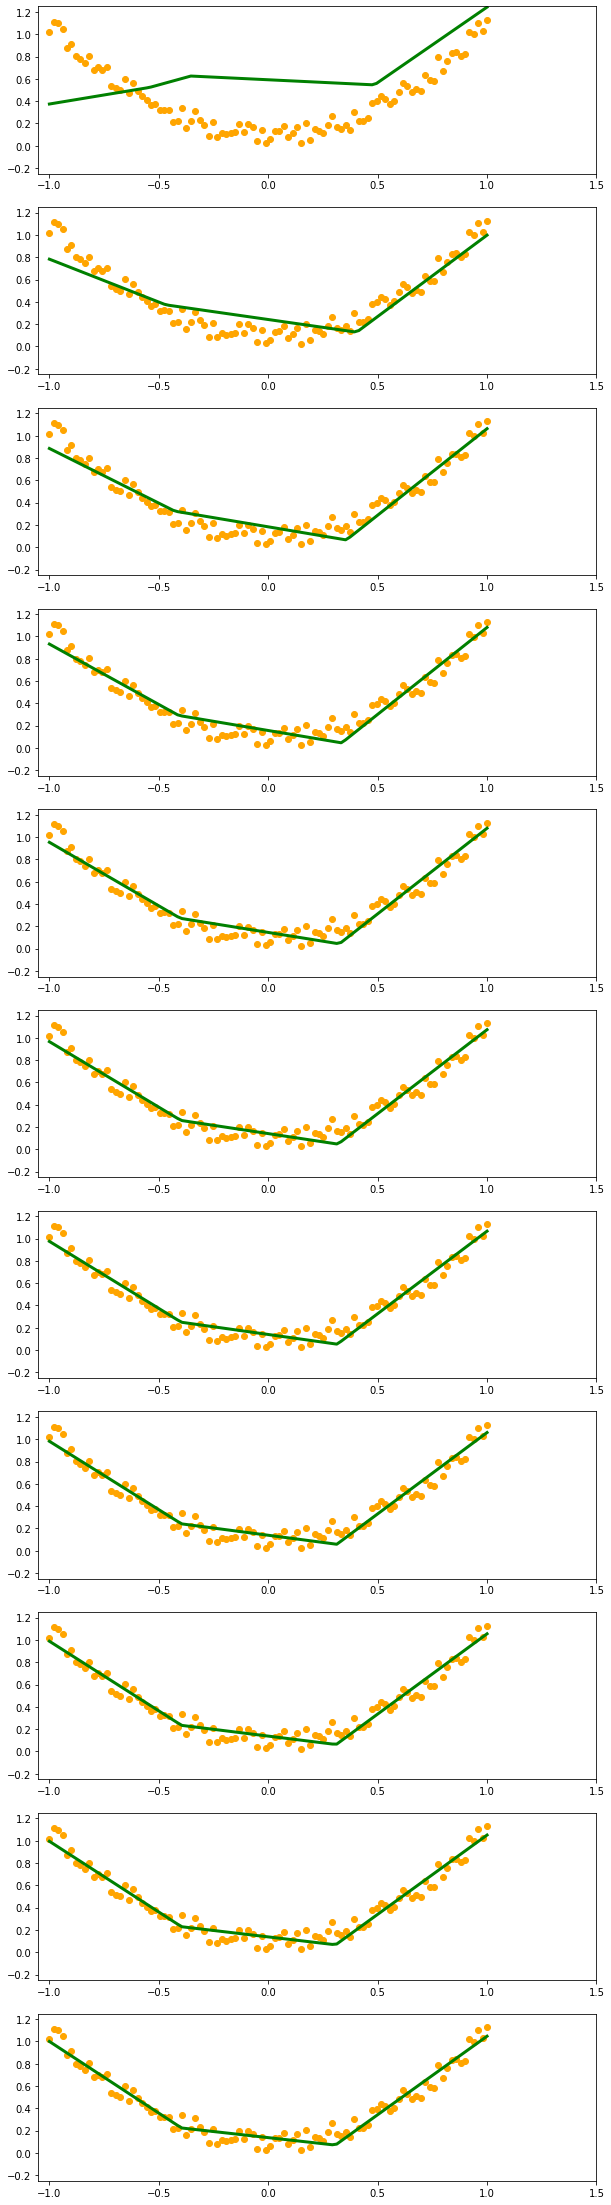

In [98]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)